(0.0, 6.0, 0.0, 20.0)

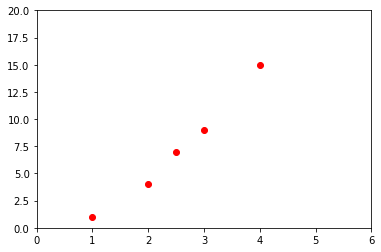

In [74]:
# Linear Regression
# y = mx + b
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

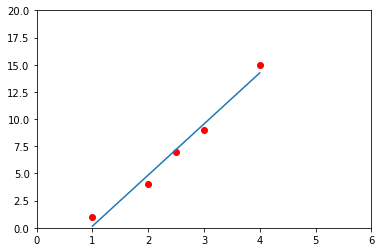

In [75]:
plt.plot(x,y, 'ro')
plt.axis([0,6,0,20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)))
plt.show()

In [76]:
# Setup and imports
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import clear_output

from tensorflow import feature_column as fc
import tensorflow as tf

In [77]:
# Titanic dataset
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [78]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [79]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [80]:
dftrain.shape

(627, 9)

<AxesSubplot:>

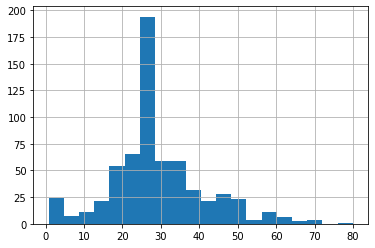

In [81]:
dftrain.age.hist(bins=20)

<AxesSubplot:>

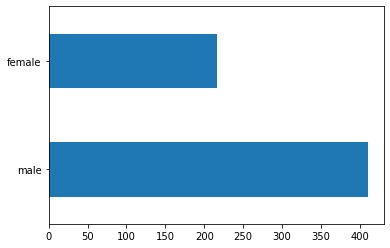

In [82]:
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

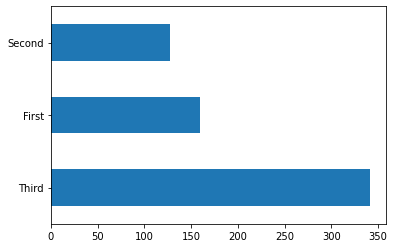

In [83]:
dftrain["class"].value_counts().plot(kind="barh")

Text(0.5, 0, '% survived')

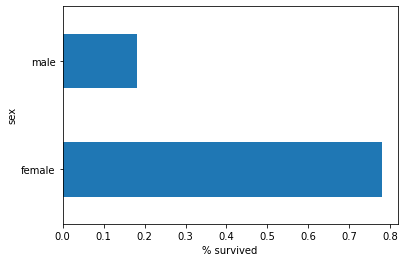

In [84]:
pd.concat([dftrain, y_train], axis=1).groupby("sex").survived.mean().plot(kind="barh").set_xlabel("% survived")

In [85]:
# Feature Columns
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']
feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [86]:
# Input function: from pandas dataframe to tensorflow dataset
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_fn():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_fn

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [87]:
# Create the model
linear_estimator = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpx0o8uj4g', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [88]:
# Train the model
linear_estimator.train(train_input_fn)
result = linear_estimator.evaluate(eval_input_fn)

clear_output()
print("Accuracy:", result['accuracy'])

Accuracy: 0.75


In [89]:
result = list(linear_estimator.predict(eval_input_fn))
clear_output()
print(dfeval.loc[0])
print("It survived",y_eval.loc[0])
print("Probability", result[0]['probabilities'][1])

sex                          male
age                          35.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 0, dtype: object
It survived 0
Probability 0.067114756


<AxesSubplot:title={'center':'Probabilities of surviving'}, ylabel='Frequency'>

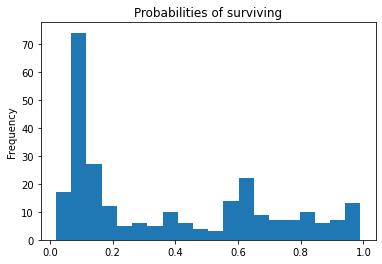

<AxesSubplot:title={'center':'Probabilities of surviving'}, ylabel='Frequency'>

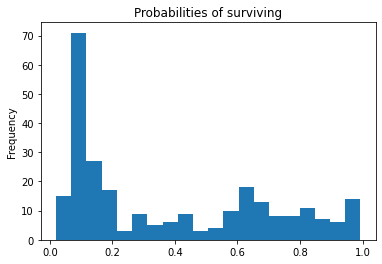

In [90]:
probs = pd.Series([pred['probabilities'][1] for pred in result])
probs.plot(kind="hist", bins=20, title="Probabilities of surviving")

In [91]:
# Classification

CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

In [92]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [93]:
train_y = train.pop('Species')
test_y = test.pop('Species')

In [94]:
train.shape

(120, 4)

(120, 4)

In [95]:
def input_fn(features, labels, training=True, batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features),labels))

    if training:
        dataset = dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size)

In [96]:
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]
[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [97]:
# Create the model
# DNNClassifier (Deep Neural Network Classifier)
# LinearClassifier

classifier = tf.estimator.DNNClassifier(feature_columns=my_feature_columns,
                                        hidden_units=[30,10],
                                        n_classes=3)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp4yjckzj5', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir'

In [98]:
# Training
classifier.train(input_fn=lambda: input_fn(train, train_y),
                  steps=5000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


2022-04-13 11:23:22.316022: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 11:23:22.316747: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmp4yjckzj5/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.2985116, step = 0
INFO:tensorflow:global_step/sec: 258.339
INFO:tensorflow:loss = 1.1474285, step = 100 (0.388 sec)
INFO:tensorflow:global_step/sec: 322.839
INFO:tensorflow:loss = 1.078228, step = 200 (0.310 sec)
INFO:tensorflow:global_step/sec: 296.699
INFO:tensorflow:loss = 1.0267034, step = 300 (0.336 sec)
INFO:tensorflow:global_step/sec: 395.72
INFO:tensorflow:loss = 0.9840074, step = 400 (0.253 sec)
INFO:tensorflow:global_step/sec: 416.996
INFO:tensorflow:loss = 0.94887996, step = 500 (0.240 sec)
INFO:tensorflow:global_step/sec: 411.004
INFO:tensorflow:loss = 0.92124087, step = 600 (0.243 sec)
INFO:tensorflow:global_step/sec: 391.833
INFO:tensorflow:loss = 0.8920996, step = 700 (0.255 sec)
INFO:tensorflow:global_step/sec: 337.477
INFO:t

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


2022-04-13 11:24:01.858925: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 11:24:01.859532: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpaiuubpl7/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.353236, step = 0
INFO:tensorflow:global_step/sec: 345.562
INFO:tensorflow:loss = 1.0737755, step = 100 (0.290 sec)
INFO:tensorflow:global_step/sec: 441.542
INFO:tensorflow:loss = 0.9767587, step = 200 (0.226 sec)
INFO:tensorflow:global_step/sec: 369.572
INFO:tensorflow:loss = 0.9368386, step = 300 (0.271 sec)
INFO:tensorflow:global_step/sec: 335.227
INFO:tensorflow:loss = 0.9073857, step = 400 (0.298 sec)
INFO:tensorflow:global_step/sec: 302.44
INFO:tensorflow:loss = 0.8634319, step = 500 (0.331 sec)
INFO:tensorflow:global_step/sec: 403.195
INFO:tensorflow:loss = 0.83683187, step = 600 (0.247 sec)
INFO:tensorflow:global_step/sec: 390.036
INFO:tensorflow:loss = 0.8144965, step = 700 (0.258 sec)
INFO:tensorflow:global_step/sec: 330.473
INFO:te

In [99]:
eval_result = classifier.evaluate(input_fn=lambda: input_fn(train, train_y, training=False))

print("\nTest set accuracy: {accuracy:0.3f}\n".format(**eval_result))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-04-13T11:23:37
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp4yjckzj5/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


2022-04-13 11:23:37.367299: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 11:23:37.368575: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


INFO:tensorflow:Inference Time : 0.38114s
INFO:tensorflow:Finished evaluation at 2022-04-13-11:23:37
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.90833336, average_loss = 0.42104012, global_step = 5000, loss = 0.42104012
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmp4yjckzj5/model.ckpt-5000

Test set accuracy: 0.908

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-04-13T11:24:16
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpaiuubpl7/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.27054s
INFO:tensorflow:Finished evaluation at 2022-04-13-11:24:16
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.94166666, average_loss = 0.4225383, global_step = 5000, loss = 0.4225383


2022-04-13 11:24:16.289775: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 11:24:16.290520: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /tmp/tmpaiuubpl7/model.ckpt-5000

Test set accuracy: 0.942



In [100]:
# Predictions
def input_fn(features, batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
    valid = True
    while valid:
        val = input(feature + ": ")
        if not val.isdigit(): valid = False
    predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(SPECIES[class_id], 100 * probability))

Please type numeric values as prompted.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp4yjckzj5/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Virginica" (70.4%)


2022-04-13 11:23:50.474359: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 11:23:50.475211: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Please type numeric values as prompted.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpaiuubpl7/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Prediction is "Virginica" (62.2%)


2022-04-13 11:24:28.032556: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-13 11:24:28.033396: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [101]:
# Hidden Markov Models
import tensorflow as tf
import tensorflow_probability as tfp

In [102]:
initial_distribution = tfp.distributions.Categorical(probs=[0.8, 0.2])
transition_distribution = tfp.distributions.Categorical(probs=[[0.7, 0.3],[0.2, 0.8]])
observation_distribution = tfp.distributions.Normal(loc=[0., 15.], scale=[5., 10.])

In [103]:
model = tfp.distributions.HiddenMarkovModel(initial_distribution=initial_distribution,
                                            transition_distribution=transition_distribution,
                                            observation_distribution=observation_distribution,
                                            num_steps=7)

In [104]:
mean = model.mean()

with tf.compat.v1.Session() as sess:
    print(mean.numpy())

[2.9999998 5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]
[2.9999998 5.9999995 7.4999995 8.25      8.625001  8.812501  8.90625  ]
